<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Supervised Learning**

In [1]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/wage.csv'
df_wage = pd.read_csv(file_path)

In [5]:
df_wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [6]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [7]:
df_wage.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [8]:
df_wage.describe(include=['object'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [9]:
# Look at all available plotting styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use("ggplot")

In [11]:
# need to reshape data to plot correctly
df_edu = df_wage.pivot(columns='education', values='wage')

In [12]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


In [13]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

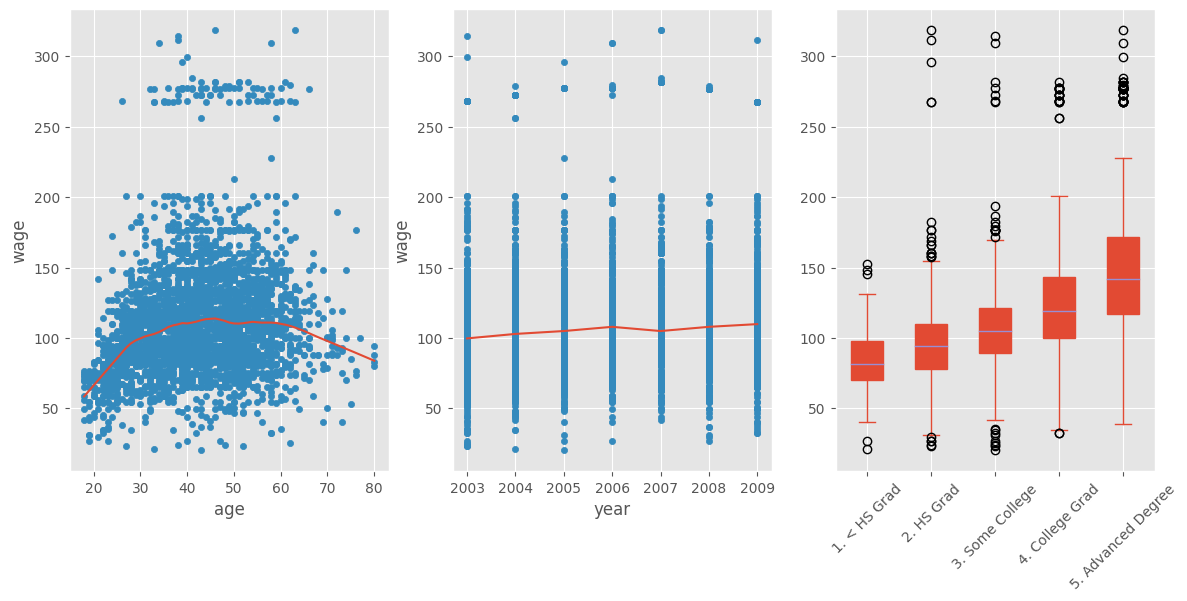

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))

df_wage.plot.scatter('age', 'wage', ax=ax[0]) #ax[0]: Refers to the first subplot (left).
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)

boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

In [19]:
import seaborn as sns

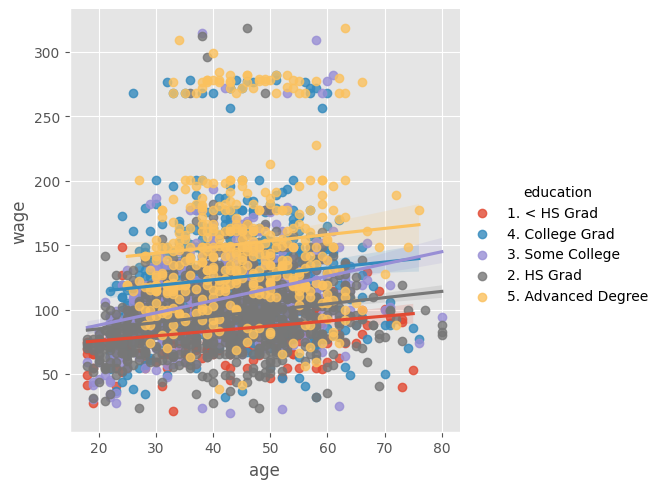

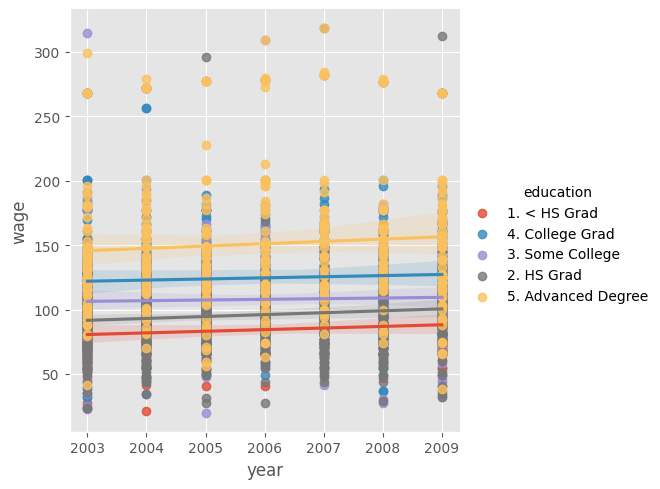

In [21]:
# Similar plots to those above
sns.lmplot(x='age', y='wage', data=df_wage, hue='education')

sns.lmplot(x='year', y='wage', data=df_wage, ci=99.99, hue='education');

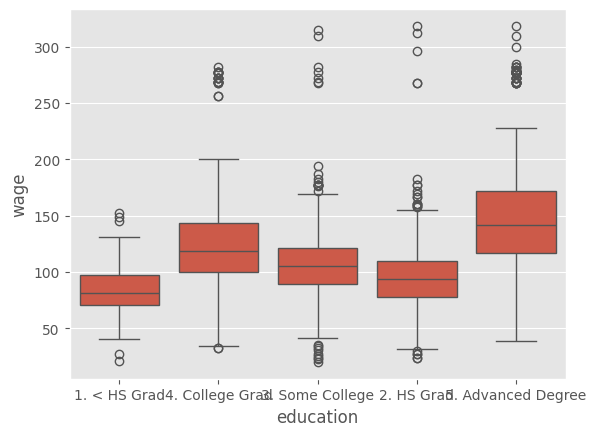

In [22]:
sns.boxplot(x='education', y='wage', data=df_wage);

In [24]:
df1 = df_wage[['age', 'year', 'education', 'wage']]
df1.head()

,age,year,education,wage
0,18,2006,1. < HS Grad,75.043154
1,24,2004,4. College Grad,70.476020
2,45,2003,3. Some College,130.982177
3,43,2003,4. College Grad,154.685293
4,50,2005,2. HS Grad,75.043154


In [27]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


In [28]:
df_melt.tail()

,education,wage,variable,value
5995,3. Some College,154.685293,year,2008
5996,2. HS Grad,99.689464,year,2007
5997,1. < HS Grad,66.229408,year,2005
5998,3. Some College,87.981033,year,2005
5999,2. HS Grad,90.481913,year,2009


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
<ipython-input-31-afedcd27545c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)


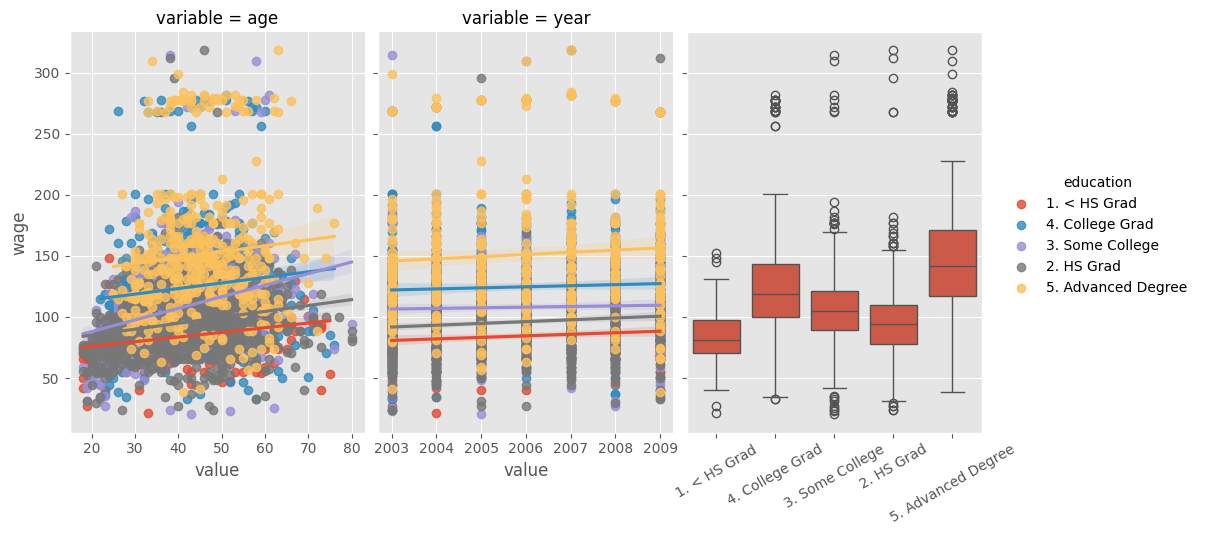

In [31]:
seaborn_grid = sns.lmplot(x='value', y='wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

#sharex=False: Ensures that the x-axis is not shared across the columns (subplots). This allows each subplot to have its own x-axis range.

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))


sns.boxplot(x='education', y='wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

## **Regression vs Classification**

In [32]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/smarket.csv'
df_smarket = pd.read_csv(file_path)

In [33]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [36]:
# Put all lags in one column. Make 'Tidy' Data
df_smarket_pivot = pd.melt(df_smarket,
                           id_vars='Direction',
                           value_vars=['Lag1', 'Lag2', 'Lag3'],
                           var_name='Lag Type',
                           value_name='Pct Change')

In [37]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


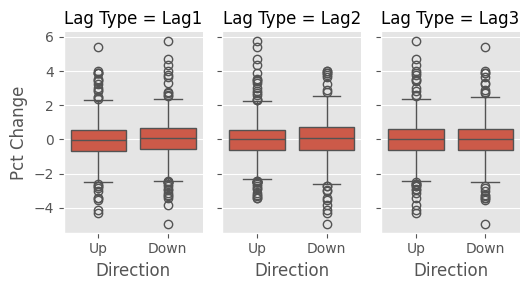

In [39]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")

**Insights:**

- By comparing the boxplots for 'Up' and 'Down' within each lag type, we can observe differences in their distributions, central tendencies, and variability.

- For example, Lag1 for 'Down' appears to have a wider range of percentage changes compared to 'Up'.

**Identifying Regression vs. Classification**


In machine learning, the distinction between regression and classification tasks depends on the nature of the target variable:

- **Regression** involves predicting a continuous value. For example, predicting the price of a house or the temperature for the next day.


- **Classification** involves predicting a discrete label. For example, predicting whether an email is spam or not spam.

**Dataset Analysis**

Let's analyze the dataset to determine whether it is suited for regression or classification.

**Target Variable:** The target variable in the dataset is Direction. It contains discrete values "Up" or "Down", indicating the market direction.


**Features:** The features include Lag1, Lag2, Lag3, Lag4, Lag5, Volume, and Today.


**Conclusion**

Since the target variable (Direction) is categorical with discrete labels ("Up" or "Down"), this is a classification problem.

## **Unsupervised Learning**

### **Dimensional Reduction**

**Principal Component Analysis (PCA)**

In [44]:
df_genes = pd.read_csv('/content/gdrive/MyDrive/STQD 6024 Machine Learning/nci60_data.csv', index_col=0) #index_col=0: This tells pandas to use the first column (0-based index) of the CSV file as the row index of the DataFrame.
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [48]:
from sklearn.decomposition import PCA

#The PCA (Principal Component Analysis) class from the sklearn.decomposition module is used for dimensionality reduction.
#PCA transforms the data into a new coordinate system such that the greatest variance of the data comes to lie on the first coordinate (the first principal component), the second greatest variance on the second coordinate, and so on.
#This can be very useful for reducing the number of dimensions in a dataset while retaining most of the variability in the data.


In [47]:
pca = PCA(2)

#This line creates a PCA object that will reduce the dimensionality of the data to 2 principal components.

In [50]:
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

df_genes_transformed.head()

#pca.fit_transform(df_genes) fits the PCA model to the data (df_genes) and transforms it, reducing the dimensionality to 2 components.

,PC1,PC2
0,-19.795781,-0.115179
1,-21.546101,1.457460
2,-25.056621,-1.526085
3,-37.409536,11.389546
4,-50.218642,1.346257


In summary, this code reduces the dimensionality of the df_genes DataFrame to 2 principal components using PCA and creates a new DataFrame with these components, which is useful for further analysis or visualization.

### **Clustering**

Clustering is a type of unsupervised machine learning that involves grouping a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups (clusters). It is a common technique for statistical data analysis used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

No longer interested in prediction - looking to discover underlying similarities in the data

**K-means Clustering**

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(4)

In [53]:
kmeans.fit(df_genes_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [54]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [55]:
df_genes_transformed['cluster'] = kmeans.labels_

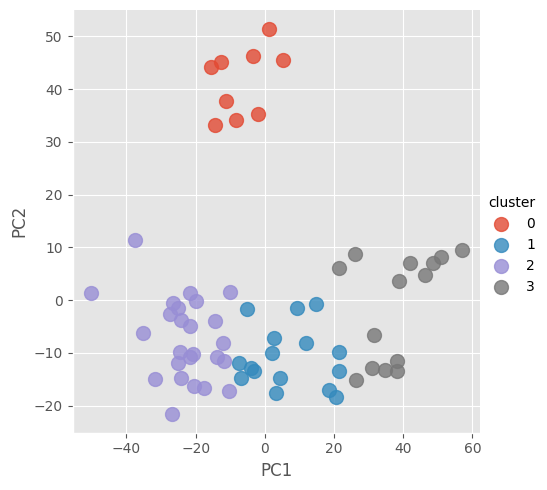

In [56]:
sns.lmplot(x='PC1', y='PC2', data=df_genes_transformed, fit_reg=False, hue='cluster',
           scatter_kws={"marker": "D", "s": 100})